In [1]:
import torch
import numpy as np
import json
import sys
import pickle
from rnndissect.utils.nlp_utils import sentence_to_tensor, tokenize_sentence
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model_path = "/home/goncalo/Documents/RNNDissect/models/Bidirectional.pth"
json_path = "/home/goncalo/.rnndissect/activations/acts_As_frustrating_as_this_episode_is,_because_all_of_these_people_should_know_better,_it's_perhaps_one_of_the_most_honest_in_a_long_time..json"
vocab_path = "/home/goncalo/Documents/RNNDissect/assets/vocab.pickle"
sentence = "As frustrating as this episode is, because all of these people should know better, it's perhaps one of the most honest in a long time."

with open(json_path, "r") as jsonf:
    acts= json.loads(jsonf.read())
    
with open(vocab_path, "rb") as vocabf:
        vocab = pickle.load(vocabf)

Tokenize the sentence for later usage

In [18]:
tokens = tokenize_sentence(sentence, vocab)

Create the vectors with the activations for each gate.

In [3]:
gate_chars = ["i", "f", "g", "o", "c", "h"]
T = int(((len(acts.keys()) - 8) / (2 * 6 * 2)))

In [4]:
i_seq, f_seq, g_seq, o_seq, c_seq, h_seq = (np.empty((1, 256)) for _ in range(6))
gates = {gate_char:acts for (gate_char,acts) in zip(gate_chars, (i_seq, f_seq, g_seq, o_seq, c_seq, h_seq))}

for l in range(2):
    for t in range(T):
        for key in gates.keys():
            gates[key] = np.vstack((gates[key], np.array(acts[f"{key}{t}{l}"]).squeeze()))   
    #cell and hidden state have an extra value at the end of the layer
    for state in ("c", "h"):
        gates[state] = np.vstack((gates[state], np.array(acts[f"{state}{T}{l}"]).squeeze()))

#remove first entry as it was only useful for defining the shape
for key in gates.keys():
    gates[key] = gates[key][1:]

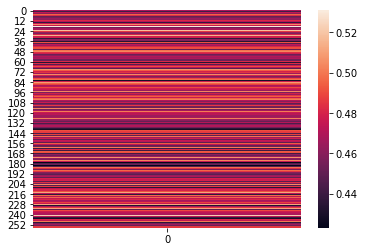

In [5]:
sns.heatmap(np.expand_dims(gates["i"][0], axis=1))
plt.show()

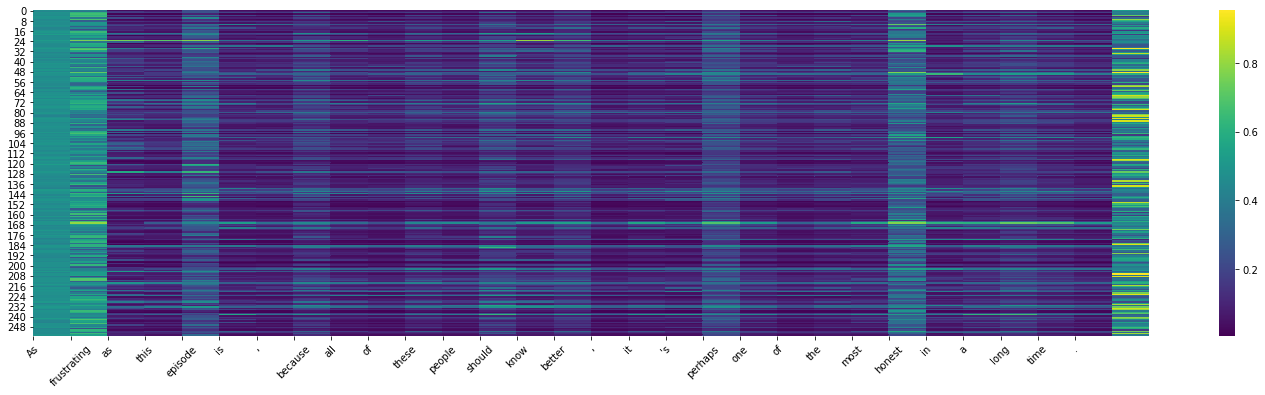

In [35]:
ticks = [str(token) for token in tokens]
plt.figure(figsize=(25, 6))
sns.heatmap(np.transpose(gates["i"][:30]), cmap='viridis')
plt.xticks(range(29), ticks, rotation="45")
plt.show()